In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [2]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)

C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3438226185.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3438226185.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3438226185.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3438226185.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [3]:
for year in range(2010, 2022):
    df[year].loc[df[year]['남편연령'] > df[year]['아내연령'], "결혼 연령차 유형"] = "남성 연상혼" 
    df[year].loc[df[year]['남편연령'] < df[year]['아내연령'], "결혼 연령차 유형"] = "여성 연상혼" 
    df[year].loc[df[year]['남편연령'].astype(int) == df[year]['아내연령'].astype(int), "결혼 연령차 유형"] = "동갑혼" 

    df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 기준 대도시 유무"] = "대도시 거주" 
    df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 기준 대도시 유무"] = "대도시 비거주" 

    df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 기준 대도시 유무"] = "대도시 거주" 
    df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 기준 대도시 유무"] = "대도시 비거주" 
    
    df[year].loc[df[year]["결혼 연령차 유형"] == "여성 연상혼" , "강혼 여부"] = 1
    df[year].loc[~(df[year]["결혼 연령차 유형"] == "여성 연상혼"), "강혼 여부"] = 0

    #여성 대도시 거주 유무와 결혼 연령차 유형 연관성 높음
    #남편 대도시 거주 유무와 결혼 연령차 유형 2021 제외 연관성 높음

In [4]:
df[2010]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,결혼 연령차 유형,아내 기준 대도시 유무,남편 기준 대도시 유무,강혼 여부
0,2010,12,24,38,38,2010,10,3,3,5,...,32.679,30.490,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0.0
1,2010,12,28,31,11,2010,12,5,13,3,...,28.030,28.723,1.0,NaN,1.0,NaN,동갑혼,대도시 거주,대도시 비거주,0.0
2,2010,12,28,26,26,2010,9,3,13,5,...,29.400,28.556,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0.0
3,2010,12,24,38,38,2010,10,3,13,5,...,29.671,26.150,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0.0
4,2010,12,28,26,26,2010,9,7,2,5,...,28.991,28.526,1.0,NaN,1.0,NaN,동갑혼,대도시 비거주,대도시 비거주,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326601,2010,8,5,11,11,2010,6,3,3,6,...,34.435,27.871,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0.0
326602,2010,11,17,24,24,2010,10,3,3,5,...,34.728,30.904,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0.0
326603,2010,8,5,11,11,2010,4,7,13,5,...,26.424,29.517,1.0,NaN,1.0,NaN,여성 연상혼,대도시 거주,대도시 거주,1.0
326604,2010,7,8,11,11,2010,7,3,3,5,...,30.361,29.597,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0.0


In [5]:
crosstab_years = {}

for year in range(2010, 2022):
    crosstab_years[year] = pd.crosstab(df[year]['남편 기준 대도시 유무'], df[year]['결혼 연령차 유형'], margins=True)

In [6]:


c, p, dof, expected = scipy.stats.chi2_contingency(crosstab_years[2018])

In [7]:
print("c-val : " + str(c))
print("P-val : " + str(p))
print("c\dof : " + str(dof) )

c-val : 37.345877320908684
P-val : 1.5075611896632631e-06
c\dof : 6


### 강혼 / 소득 관계

In [65]:
i = 2020

crosstab = pd.crosstab(df[i]['아내직업코드'], df[i]["강혼 여부"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)

print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof) )

# 강혼 여부와 소득 사이에는 연관성 큼

c-val : 223.3776808645135
P-val : 7.442992539024987e-44
dof : 8


C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3393461151.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

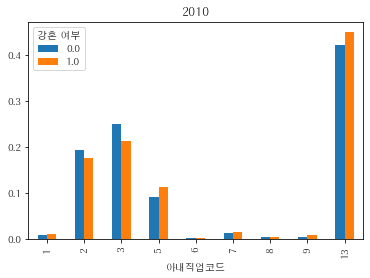

<Figure size 432x288 with 0 Axes>

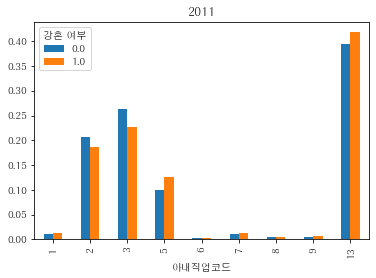

<Figure size 432x288 with 0 Axes>

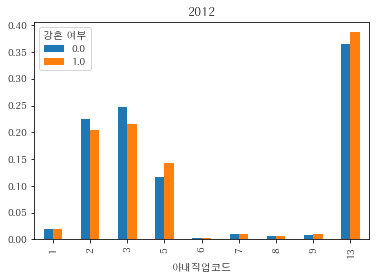

<Figure size 432x288 with 0 Axes>

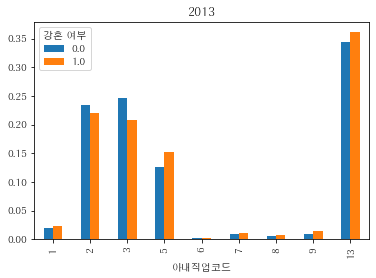

<Figure size 432x288 with 0 Axes>

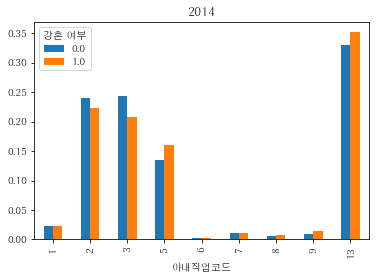

<Figure size 432x288 with 0 Axes>

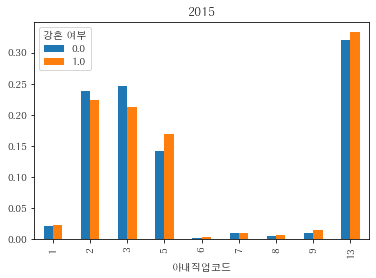

<Figure size 432x288 with 0 Axes>

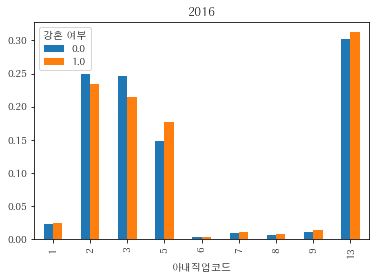

<Figure size 432x288 with 0 Axes>

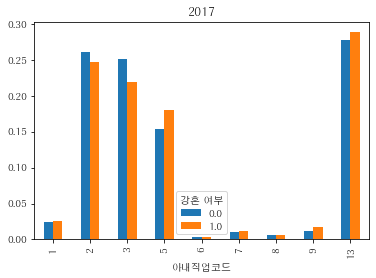

<Figure size 432x288 with 0 Axes>

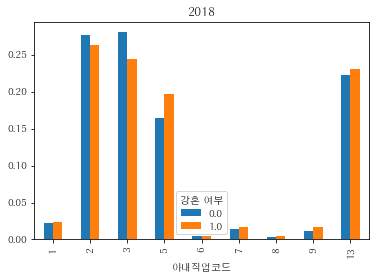

<Figure size 432x288 with 0 Axes>

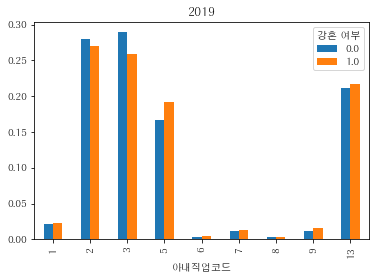

<Figure size 432x288 with 0 Axes>

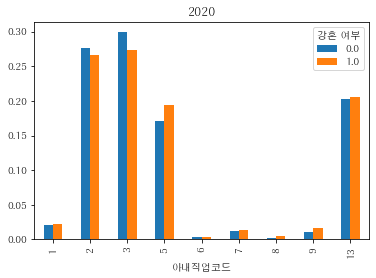

<Figure size 432x288 with 0 Axes>

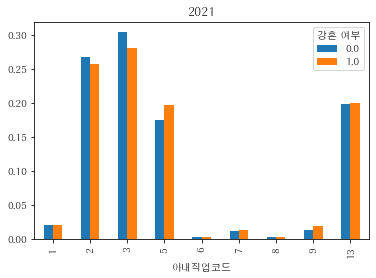

In [67]:

for y in range(2010, 2022):
    plt.figure()
    crosstab = pd.crosstab(df[y]['아내직업코드'], df[y]["강혼 여부"], normalize='columns')
    crosstab.plot.bar()
    plt.title(str(y))

# 강혼과 고소득은 양의 상관관계라고 보기 힘듦 


### 대도시 거주 / 소득 관계

C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\3604482225.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

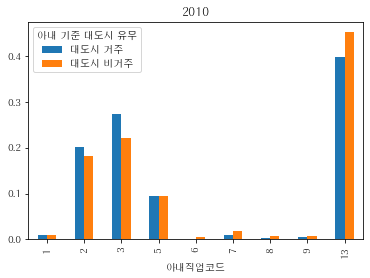

<Figure size 432x288 with 0 Axes>

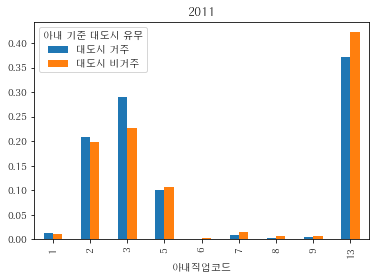

<Figure size 432x288 with 0 Axes>

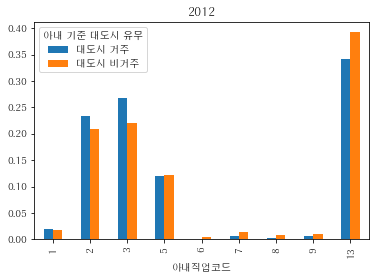

<Figure size 432x288 with 0 Axes>

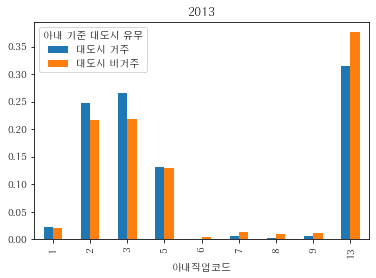

<Figure size 432x288 with 0 Axes>

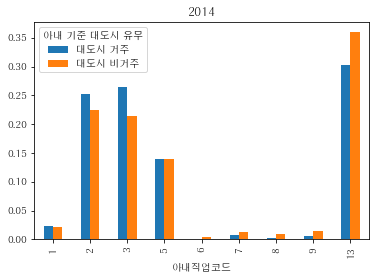

<Figure size 432x288 with 0 Axes>

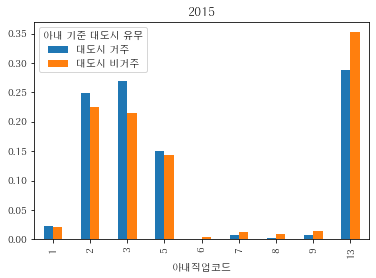

<Figure size 432x288 with 0 Axes>

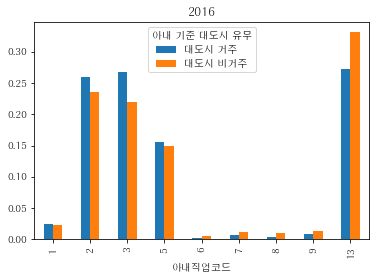

<Figure size 432x288 with 0 Axes>

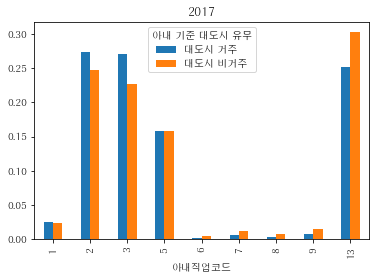

<Figure size 432x288 with 0 Axes>

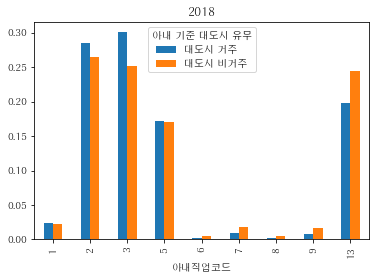

<Figure size 432x288 with 0 Axes>

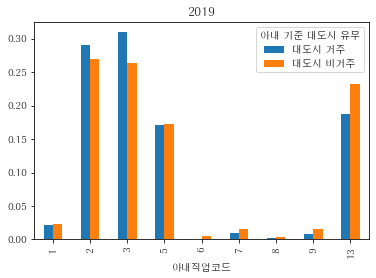

<Figure size 432x288 with 0 Axes>

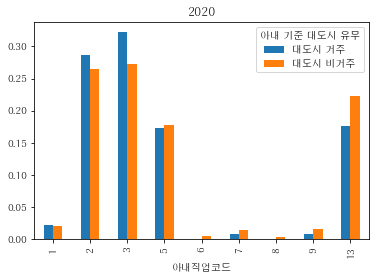

<Figure size 432x288 with 0 Axes>

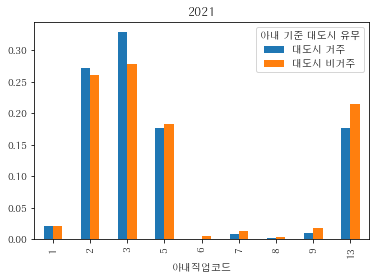

In [40]:




# 대체적으로 고소득 (1, 2, 3) -> 대도시 거주 여성 중 퍼센테이지 높음
# 각각 대도시 거주 중 / 대도시 비거주 중 해당 직업 퍼센테이지

for y in range(2010, 2022):
    plt.figure()
    crosstab = pd.crosstab(df[y]['아내직업코드'], df[y]["아내 기준 대도시 유무"], normalize='columns')
    crosstab.plot.bar()
    plt.title(str(y))


C:\Users\nexen\AppData\Local\Temp\ipykernel_19496\2937351441.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

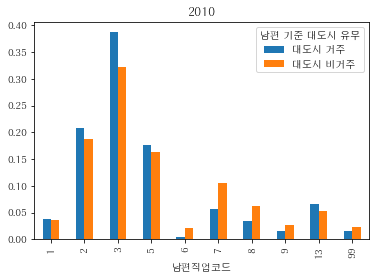

<Figure size 432x288 with 0 Axes>

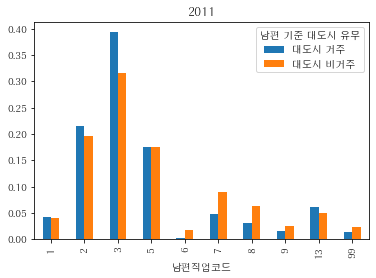

<Figure size 432x288 with 0 Axes>

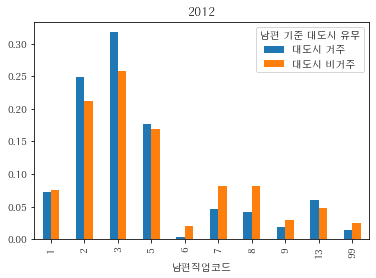

<Figure size 432x288 with 0 Axes>

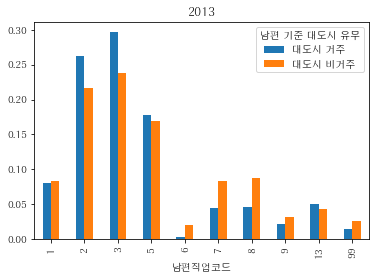

<Figure size 432x288 with 0 Axes>

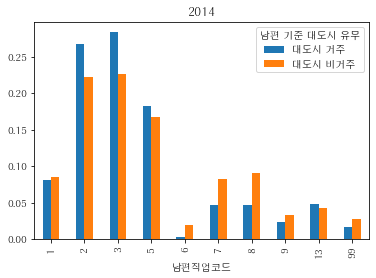

<Figure size 432x288 with 0 Axes>

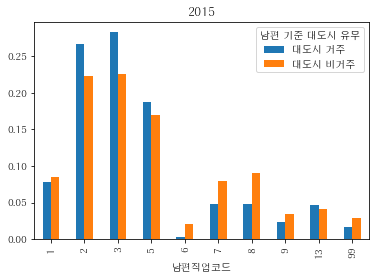

<Figure size 432x288 with 0 Axes>

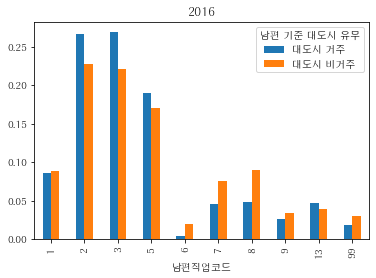

<Figure size 432x288 with 0 Axes>

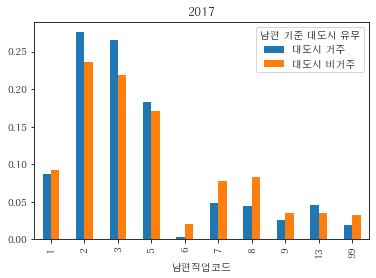

<Figure size 432x288 with 0 Axes>

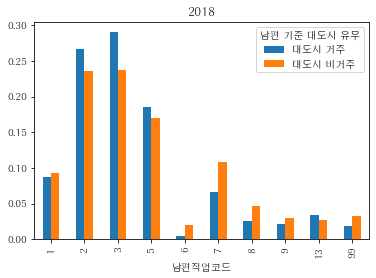

<Figure size 432x288 with 0 Axes>

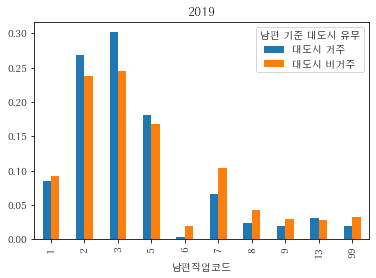

<Figure size 432x288 with 0 Axes>

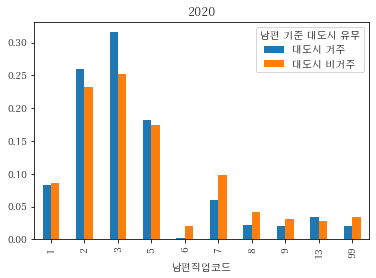

<Figure size 432x288 with 0 Axes>

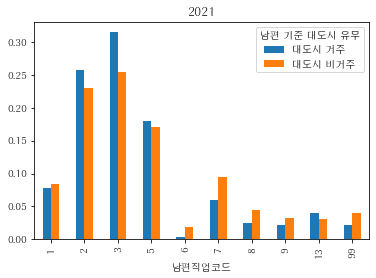

In [52]:
# 직업 코드 1 -> 대도시 비거주 우세 / 2, 3 대도시 거주 우세
# 각각 대도시 거주 중 / 대도시 비거주 중 해당 직업 퍼센테이지

for y in range(2010, 2022):
    plt.figure()
    crosstab = pd.crosstab(df[y]['남편직업코드'], df[y]["남편 기준 대도시 유무"], normalize='columns')
    crosstab.plot.bar()
    plt.title(str(y))

In [61]:
i = 2012

crosstab = pd.crosstab(df[i]['남편직업코드'], df[i]["남편 기준 대도시 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)

print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof) )

# 남편직업(소득)과 남편의 대도시 거주 유무는 큰 연관성을 보임

c-val : 7243.833198530192
P-val : 0.0
dof : 9
